In [42]:
# !pip install -qq datasets
!pip install -qq huggingface_hub

In [44]:
from huggingface_hub import notebook_login

notebook_login()

In [26]:
import torch
from torchvision import transforms
import PIL
from pathlib import Path
import os
import random
from datasets import load_dataset

In [3]:
!pwd

/workspace/diffusion-models-class/unit1


In [4]:
img_dir_src = Path('./pokemon-icons')

In [5]:
%cd /workspace

/workspace


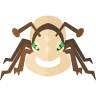

In [75]:
img_format = '.jpg'
idx = -50
img_list = list(img_path.glob('*.png'))
img = PIL.Image.open(img_list[idx])
img_name = img_list[idx].stem.split('@')[0] + img_format
img_name
img

In [84]:
img_paths

<generator object Path.glob at 0x7f4b10385c50>

In [6]:
dir_src = Path('./pokemon-icons/_icons/PNG/3x')
dir_dst = Path('./diffusion-models-class/unit1/pokemon-cute')
dir_dst.mkdir(exist_ok=True)
img_format = '.png'
img_paths = dir_src.glob('*.png')

for img_path in img_paths:
    img_name = img_path.stem.split('@')[0] + img_format
    try:
        img = PIL.Image.open(img_path).convert('RGBA')
        img_rgb = PIL.Image.new("RGB", img.size, (255, 255, 255))
        img_rgb.paste(img, img)
        img_rgb.save(dir_dst / img_name)
    except:
        print(img_path)

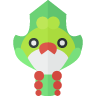

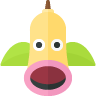

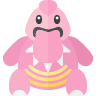

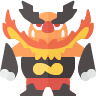

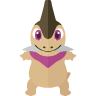

In [12]:
for img in random.choices(list(dir_dst.glob('*.png')), k=5):
    display(PIL.Image.open(img))

In [22]:
dataset_dict = dict()
dataset_dict['image'] = [str(img_path) for img_path in list(dir_dst.glob('*.png'))]
dataset_dict['label'] = [img.split('/')[-1].split('.')[0].replace('-', '_') for img in dataset_dict['image']]

In [45]:
from datasets import Dataset, Image
pokemon_cute = Dataset.from_dict(dataset_dict).cast_column("image", Image())

006_charizard_shiny


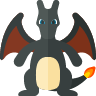

In [46]:
print(pokemon_cute[10]['label'])
pokemon_cute[10]['image']

In [48]:
pokemon_cute.push_to_hub("matteopilotto/pokemon_cute")

  0%|          | 0/2 [00:00<?, ?ba/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]